# Getting Started

In this tutorial we will show you how to install and use the `autofeat` package for single-feature extraction. We apply the package to the problem of ***time-series forecasting*** i.e. using past values of a time-series to predict future values.

## Table of Contents

- Install Packages
- Load Dataset
- Feature Extraction
- Fit Model
- Evaluate Model

Feel free to follow along in this Google Colab notebook - 

<a href="https://colab.research.google.com/github/autonlab/AutoFeat/blob/main/examples/tutorials/single_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Packages

In [1]:
%%capture
!pip install git+https://github.com/autonlab/AutoFeat.git

In [3]:
import autofeat as aft
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

List available datasets that we can use for this tutorial:

In [4]:
print(aft.utils.datasets.list_datasets())

['air passengers']


Load the ***Airline Passengers*** dataset:

In [5]:
air_passengers_df = aft.utils.datasets.get_dataset(name='air passengers')
air_passengers_df.head()

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0


Plot the time-series (it is often useful to visualize the data before we start modeling):

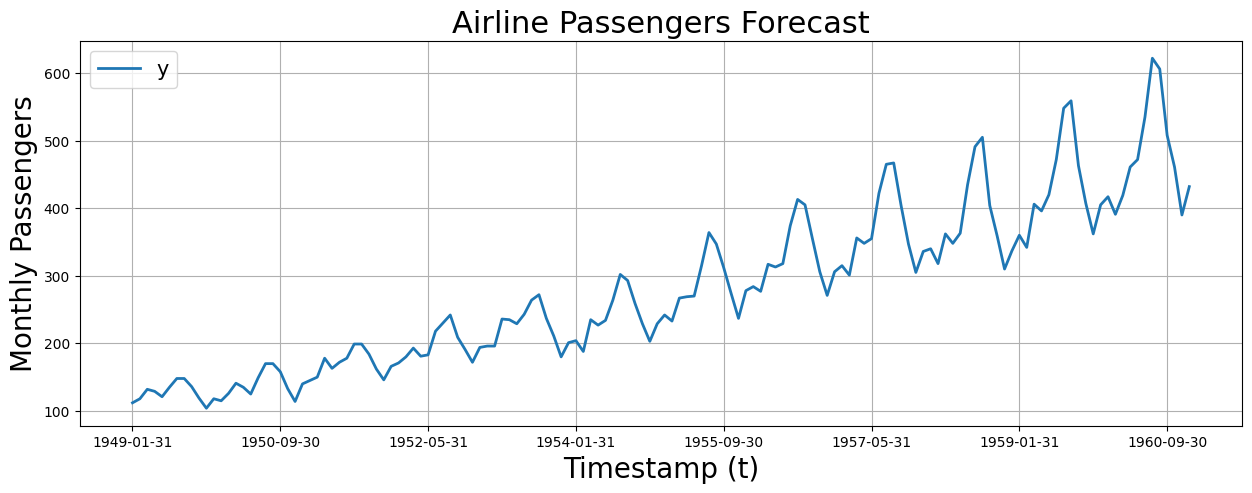

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
plot_df = air_passengers_df.set_index('ds')

plot_df[['y']].plot(ax=ax, linewidth=2)
ax.set_title('Airline Passengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp (t)', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

## Feature Extraction

Set the parameters of the sliding window to perform feature extraction:

- `window_size`: the size of the sliding window
- `step_size`: the stride of the sliding window

In [7]:
# Sliding Window
window_size = 12
step_size = 1
sliding_window = aft.SlidingWindow(window_size=window_size, step_size=step_size)

Define the feature we want to extract from the time-series. Here we will be considering the ***mean*** of the time-series values in each window. For a particular window of size $w$, the mean is defined as:

$$
\text{mean} = \frac{1}{w} \sum_{i=1}^{w} x_i
$$

where $x_i$ is the value of the time-series at time $i$.

In [10]:
feature_extractor = aft.MeanTransform()
featurizer = sliding_window.use(feature_extractor)
features = featurizer(air_passengers_df['y'].values)

(144,)


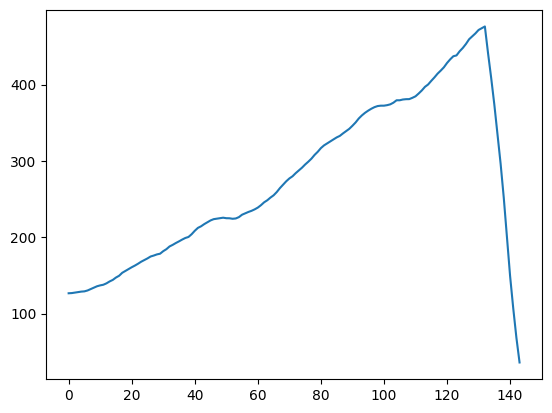

In [12]:
print(features.shape)
# Plotting features
plt.plot(features)

# Fit Model

$P( Y | X )$

$P(Y_{t+1} | Y_{t}, Y_{t-12})$

# Evaluate Model

If you enjoy using `AutoFeat`, please consider starring the [repository](https://github.com/autonlab/AutoFeat) ⭐️.